<a href="https://colab.research.google.com/github/theredditbandit/learning-deep-learning/blob/master/not_hotdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai duckduckgo_search

# Imports

In [11]:
from duckduckgo_search import ddg_images, DDGS
from fastcore.all import *

from fastdownload import download_url
from fastai.vision.all import *

from time import sleep

## Search

In [5]:
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    # return L(ddg_images(term, max_results=max_images)).itemgot('image')
    return L(DDGS().images(term,max_results=max_images)).itemgot('image')

In [8]:
urls = search_images('hotdog photos', max_images=15)
# print(urls)
urls[0]

Searching for 'hotdog photos'


'https://www.charbroil.com.au/Images/Recipes/Main/Hot-Dog-II.jpg'

# Download Images

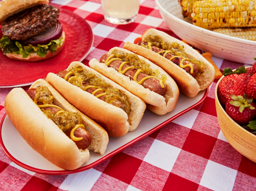

In [7]:
dest = 'hotdog.jpg'
download_url(urls[0],dest,show_progress=True)
im = Image.open(dest)
im.to_thumb(256,256)

Let us download some non hotdog photos

Searching for 'spaghetti photos'


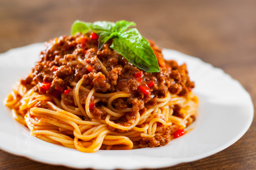

In [24]:
download_url(search_images('spaghetti photos', max_images=5)[0], 'spaghetti.jpg', show_progress=False)
Image.open('spaghetti.jpg').to_thumb(256,256)

In [35]:
items = ['spaghetti','hotdog','doughnut','pizza','cheese cake','burger']
for item in items:
    download_url(search_images(f'{item} photos', max_images=5)[0], f'{item}.jpg', show_progress=False)

Searching for 'spaghetti photos'
Searching for 'hotdog photos'
Searching for 'doughnut photos'
Searching for 'pizza photos'
Searching for 'cheese cake photos'
Searching for 'burger photos'


In [36]:
searches = 'spaghetti','hotdog','doughnut','pizza','cheese cake','burger'
path = Path('hotdog_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True,parents=True)
    download_images(dest,urls=search_images(f'{o} photo'))
    download_images(dest,urls=search_images(f'{o} on table'))
    download_images(dest,urls=search_images(f'person eating {o}'))
    resize_images(path/o,max_size=400,dest=path/o)

Searching for 'doughnut photo'
Searching for 'doughnut on table'
Searching for 'person eating doughnut'
Searching for 'pizza photo'
Searching for 'pizza on table'
Searching for 'person eating pizza'


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for 'cheese cake photo'
Searching for 'cheese cake on table'
Searching for 'person eating cheese cake'
Searching for 'burger photo'
Searching for 'burger on table'
Searching for 'person eating burger'


# Training the model

In [38]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

17

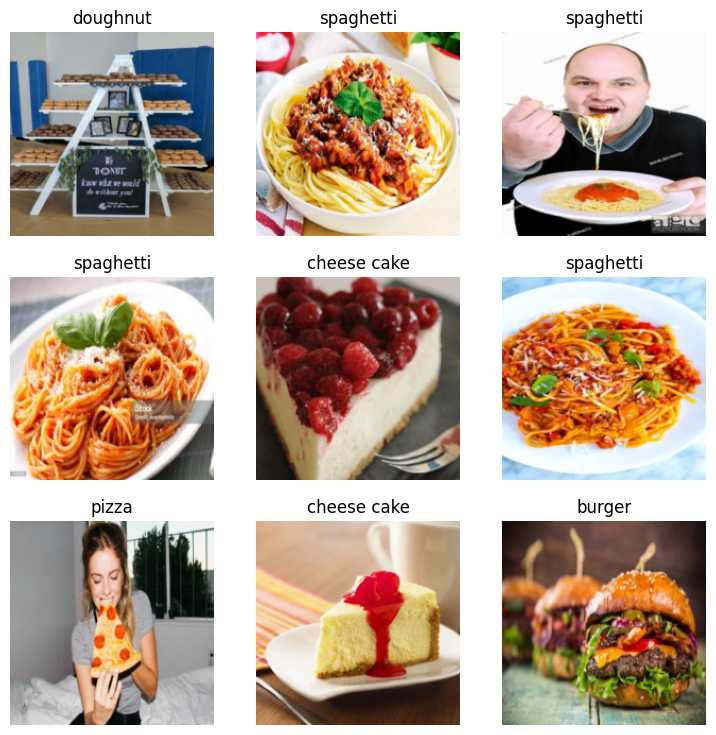

In [39]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192,method='squish')]
).dataloaders(path,bs=32)

dls.show_batch(max_n = 9)

In [52]:
learn = vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,2.296445,1.018534,0.268041,00:56


epoch,train_loss,valid_loss,error_rate,time
0,0.963386,0.672977,0.226804,01:22
1,0.715201,0.548837,0.195876,01:22
2,0.521206,0.453368,0.175258,01:23
3,0.375560,0.442645,0.154639,01:21
4,0.287150,0.402206,0.154639,01:23
5,0.223712,0.409694,0.134021,01:23
6,0.179842,0.413580,0.175258,01:22
7,0.141489,0.494510,0.144330,01:21
8,0.110681,0.377702,0.123711,01:23
9,0.087585,0.371075,0.113402,01:21


# Prediction

This is a pizza
Probability it's a pizza: 0.000000


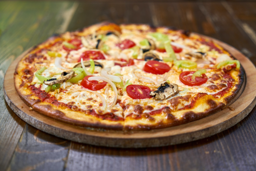

In [62]:
item = 'pizza.jpg'
# item = 'hotdog.jpg'
pred , _ , probs = learn.predict(PILImage.create(item))
print(f"This is a {pred}")
print(f"Probability it's a {pred}: {probs[0]:.6f}")

Image.open(item).to_thumb(256,256)